# BeginnerレベルのModelを実装する
単回帰のURL:https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html<br>
PCAのURL:https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html<br>
sklearnの各データセットの詳細な情報:<br> https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88

## sklearnを用いた単回帰の実装
回帰分析について分かりやすく説明しているサイト:<br>  https://udemy.benesse.co.jp/ai/regression-analysis.html<br>
sklearnの線形回帰モデルについて説明しているサイト:<br>
https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
np.set_printoptions(precision=3)

In [2]:
# Load the diabetes dataset（糖尿病のデータセット）
diabetes = datasets.load_diabetes()

In [3]:
# Use only one feature
# np.newaxis: A convenient alias for None, useful for indexing arrays.
# np.newaxisを用いると簡単にデータのネストを深くできる
diabetes_X = diabetes.data[:,np.newaxis, 2]
"""
print('diabetes.data.shape: {}'.format(diabetes.data.shape))
print(diabetes.data[:3])
print('diabetes_X.shape: {}'.format(diabetes_X.shape))
print(diabetes_X[:3])
print('\nnp.newaxisなしの場合のshape及び値は以下のようになる')
print('diabetes.data.shape: {}'.format(diabetes.data[:, 2].shape))
print(diabetes.data[:,2][:3])
"""

"\nprint('diabetes.data.shape: {}'.format(diabetes.data.shape))\nprint(diabetes.data[:3])\nprint('diabetes_X.shape: {}'.format(diabetes_X.shape))\nprint(diabetes_X[:3])\nprint('\nnp.newaxisなしの場合のshape及び値は以下のようになる')\nprint('diabetes.data.shape: {}'.format(diabetes.data[:, 2].shape))\nprint(diabetes.data[:,2][:3])\n"

In [4]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
print('X_train.shape: {}\nX_test.shape: {}'.format(diabetes_X_train.shape, diabetes_X_test.shape))

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print('y_train.shape: {}\ny_test.shape: {}'.format(diabetes_y_train.shape, diabetes_y_test.shape))

X_train.shape: (422, 1)
X_test.shape: (20, 1)
y_train.shape: (422,)
y_test.shape: (20,)


coefficients(偏回帰係数）: [938.238]
intercept（切片）: 152.91886182616167
Mean squared error: 2548.07
Variance score: 0.47


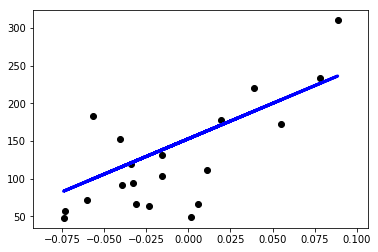

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# 偏回帰係数 y=ax+bの'a'
print('coefficients(偏回帰係数）: {}'.format(regr.coef_))
# 切片 y=ax+bの'b'
print('intercept（切片）: {}'.format(regr.intercept_))
# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

## 単回帰をBoston house-pricesデータセットに適用

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
boston = datasets.load_boston()
# boston.data: 説明変数
# boston.target: 目的変数（1000ドル台でオーナーが所有する住宅の価格の中央値）
display(pd.DataFrame(boston.data, columns=boston.feature_names).head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


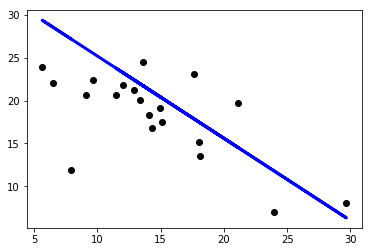

In [8]:
# 13個の説明変数（column)が存在するが、単回帰のためランダムに１つ選び実行する
# それぞれの説明変数を回帰でプロットしてみたが説明変数: RM（6番目）とLSTAT（13番目）が
# 前処理なしでも上手く回帰できているように見える
x_train = boston.data[:, np.newaxis, 12][:-20]
x_test = boston.data[:, np.newaxis, 12][-20:]
y_train = boston.target[:-20]
y_test = boston.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

# Plot outputs
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

このようなデータ分布であれば単回帰であっても、ある程度は上手くいく可能性がある<br>
しかし、もっと複雑なデータ分布であれば重回帰が必要である

## PCAをIrisデータセットに適用

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
np.set_printoptions(precision=3)

Iris.data.shape: (150, 4)
Iris target: [0 1 2]
3Dの寄与率
[0.925 0.053 0.017]
2Dの寄与率
[0.925 0.053]


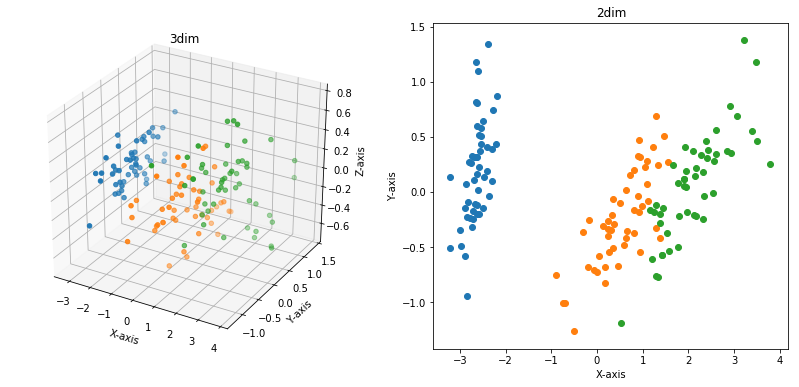

In [17]:
iris = datasets.load_iris()
print('Iris.data.shape: {}'.format(iris.data.shape))
targets = iris.target
print('Iris target: {}'.format(np.unique(iris.target)))

fig = plt.figure(figsize=(14,6))

pca = PCA(n_components=3).fit(iris.data)
X = pca.transform(iris.data)

ax = fig.add_subplot(121, projection='3d')
for label in np.unique(targets):
    ax.scatter(X[targets == label, 0],
               X[targets == label, 1],
               X[targets == label, 2])
ax.set_title('3dim')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
print('3Dの寄与率')
print(pca.explained_variance_ratio_)

pca = PCA(n_components=2).fit(iris.data)
X = pca.transform(iris.data)

ax = fig.add_subplot(122)
for label in np.unique(targets):
    ax.scatter(X[targets == label, 0],
               X[targets == label, 1])
ax.set_title('2dim')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
print('2Dの寄与率')
print(pca.explained_variance_ratio_)
plt.show()

PCA後は1軸で92%程度、2軸で97%程度、元のデータを表現できている（irisデータ自体は4次元のデータ